In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.matlib import repmat

Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

byteHammingWeight =np.array([
                            0, 1, 1, 2, 1, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 4, 1, 2,
                            2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 1, 2, 2, 3,
                            2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5, 2, 3, 3, 4, 3, 4,
                            4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 1, 2, 2, 3, 2, 3, 3, 4,
                            2, 3, 3, 4, 3, 4, 4, 5, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4,
                            4, 5, 4, 5, 5, 6, 2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5,
                            4, 5, 5, 6, 3, 4, 4, 5, 4, 5, 5, 6, 4, 5, 5, 6, 5, 6,
                            6, 7, 1, 2, 2, 3, 2, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 5,
                            2, 3, 3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 2, 3, 
                            3, 4, 3, 4, 4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 3, 4, 4, 5, 
                            4, 5, 5, 6, 4, 5, 5, 6, 5, 6, 6, 7, 2, 3, 3, 4, 3, 4, 
                            4, 5, 3, 4, 4, 5, 4, 5, 5, 6, 3, 4, 4, 5, 4, 5, 5, 6,
                            4, 5, 5, 6, 5, 6, 6, 7, 3, 4, 4, 5, 4, 5, 5, 6, 4, 5, 
                            5, 6, 5, 6, 6, 7, 4, 5, 5, 6, 5, 6, 6, 7, 5, 6, 6, 7, 
                            6, 7, 7, 8
                            ])


In [3]:
def HW(x):
    Hw = np.vectorize(lambda x: (bin(x).count("1")))
    return Hw

In [4]:
def myload(filename):
    return np.load(filename)

In [4]:
def mycorr(x,y):
    xr,xc = x.shape
    yr,yc = y.shape
    assert xr==yr, "Matrix row count mismatch"     

    x = x - x.mean(0)
    y = y - y.mean(0)
    C = x.T.dot(y)
    xsq = np.atleast_2d(np.sqrt(np.sum(x**2, 0)))
    ysq = np.atleast_2d(np.sqrt(np.sum(y**2, 0)))
    C = np.divide(C, repmat(xsq.T, 1, yc))
    C = np.divide(C, repmat(ysq, xc, 1))
    return C

In [4]:
def corr_cross_trace(trace_1, trace_2):
    r = np.corrcoef(trace_1, trace_2)
    print('Pearson coeff.', r[0,1])

In [4]:
def SNR_calculator(x, y):
    mean_tmp = []
    var_tmp = []
    for i in np.unique(y):
        index = np.where(y == i)[0]
        mean_tmp.append(np.mean(x[index, :], axis=0))
        var_tmp.append(np.var(x[index, :], axis=0))
    snr = np.var(mean_tmp, axis=0) / np.mean(var_tmp, axis=0)
    return snr

In [7]:
def load_lastround_data(num_avg,data_path,key_position=0):
    #Last round traces
    trace_name = data_path+'/'+str(num_avg)+'_nor_traces_maxmin.npy'
    trace_original = data_path+'/'+str(num_avg)+'_traces.npy'
    key_name = data_path+'/'+str(num_avg)+'_10th_roundkey.npy'
    ct_name = data_path+'/'+str(num_avg)+'_ct.npy'
    
   # traces_original = myload(trace_original)
    traces = myload(trace_name)
    traces_original = myload(trace_original)
    ciphertexts = myload(ct_name)
    keys = myload(key_name)
    keys = keys[0]
    
    
    labels = ciphertexts[:,0]^keys[0]

    #Use this to check that you loaded the files correctly
    #print("keys_last", keys)
    #print("traces_last", traces.shape)
    #print("ciphertexts_last", ciphertexts.shape)
    
    return traces,ciphertexts,keys,labels,traces_original

In [8]:
def plot_cpa(traces_last,ciphertexts_last,keys_last,labels_last):
        
        key_guess_last=np.array([])
                
        powerhyp_last=np.zeros((traces_last.shape[0],256))
        for K in range(256):
            Sout_last = ciphertexts_last[:,BYTE] ^ K
            Sout_HW_last = byteHammingWeight[Sout_last]
            powerhyp_last[:,K]=Sout_HW_last
        CC_last = mycorr(powerhyp_last, traces_last)
        guessed_key_last,time_point_last= np.unravel_index(CC_last.argmax(), CC_last.shape)
        key_guess_last=np.append(key_guess_last,guessed_key_last)
        
        #print("guessed keys last round", guessed_key_last)
        #print("correct keys last round", keys_last[0])
        
        CC_last_abs=np.maximum(CC_last,-CC_last)
        
        print("max_correlation_coefficient_value", max(CC_last[keys_last[0],:]))
        print("leakage_point", np.argmax(CC_last[keys_last[0],:]))
        #plt.figure(figsize=(14,3))
        #plt.xlabel('sample')
        #plt.ylabel('correlation coefficient')
        ##for K in range(256):
        ##    plt.plot(CC_last[K,:])
        #plt.plot(CC_last[keys_last[0],:])
        #plt.plot(traces_last[0,:],label ='The trace')
        #plt.legend()
        #plt.grid()
        #plt.show()
        #plt.savefig('Correlation_coefficient_last_10_avg_key_0.png',dpi=500)

In [9]:
def plot_snr(traces_last,ciphertexts_last,keys_last,labels_last):
        snr_last=SNR_calculator(traces_last,labels_last)        
        print("max_snr_value                    ", max(snr_last))
        print("leakage_point", np.argmax(snr_last))
        #plt.figure(figsize=(14,3))
        #plt.xlabel('sample')
        #plt.ylabel('SNR')
        #plt.plot(snr_last)
        #plt.show()
        #plt.savefig('SNR_last_round',dpi=500)

In [10]:
def plot_mean(traces_original):
    print("mean_of_the_captured_traces                    ", np.mean(traces_original))

In [16]:
if __name__ == "__main__":
    
    BYTE=0
    
    for device in range(6,11):
            
        print('-----------------Device'+str(device)+'--------------------')
        step_1=1
             
        # model path
        data_path = 'data/cpss_trace/15m/D'+str(device)
 
    
        step=1
        for num_avg in range(1,10,step):
            print('--------------------------------')
            print('Average of', num_avg, 'measurement(s)')
            print('--------------------------------')
        #--------------------------------------------------------------------------------------------------------------------------------
            traces_last,ciphertexts_last,keys_last,labels_last,traces_original = load_lastround_data(num_avg, data_path)
            #print(traces_last.shape)
            
            #print(trace_original)
            
            #plot_cpa(traces_last,ciphertexts_last,keys_last,labels_last)
            plot_snr(traces_last,ciphertexts_last,keys_last,labels_last)    
            #plot_mean(traces_original)
    
    
        step=10
        for num_avg in range(10,110,step):
            print('--------------------------------')
            print('Average of', num_avg, 'measurement(s)')
            print('--------------------------------')
        #--------------------------------------------------------------------------------------------------------------------------------
            traces_last,ciphertexts_last,keys_last,labels_last,trace_original = load_lastround_data(num_avg, data_path)
            
            #plot_cpa(traces_last,ciphertexts_last,keys_last,labels_last)
            plot_snr(traces_last,ciphertexts_last,keys_last,labels_last)    
            #plot_mean(traces_original)
        
        
        


-----------------Device6--------------------
--------------------------------
Average of 1 measurement(s)
--------------------------------
max_snr_value                     0.08033041
leakage_point 208
--------------------------------
Average of 2 measurement(s)
--------------------------------
max_snr_value                     0.077495895
leakage_point 309
--------------------------------
Average of 3 measurement(s)
--------------------------------
max_snr_value                     0.09190459
leakage_point 208
--------------------------------
Average of 4 measurement(s)
--------------------------------
max_snr_value                     0.14292325
leakage_point 208
--------------------------------
Average of 5 measurement(s)
--------------------------------
max_snr_value                     0.14454508
leakage_point 208
--------------------------------
Average of 6 measurement(s)
--------------------------------
max_snr_value                     0.15195926
leakage_point 208
------------

array([[-0.00696196, -0.00747417, -0.01232379, ...,  0.01151231,
        -0.00431867, -0.00976231],
       [ 0.00170748, -0.00063204, -0.00749832, ...,  0.01966045,
         0.00015335, -0.00036347],
       [-0.00664754,  0.0024214 , -0.0256154 , ...,  0.01448514,
        -0.00762189, -0.00903978],
       ...,
       [ 0.00664754, -0.0024214 ,  0.0256154 , ..., -0.01448514,
         0.00762189,  0.00903978],
       [-0.00170748,  0.00063204,  0.00749832, ..., -0.01966045,
        -0.00015335,  0.00036347],
       [ 0.00696196,  0.00747417,  0.01232379, ..., -0.01151231,
         0.00431867,  0.00976231]])

In [27]:
def load_firstround_data(key_position=0):
    #Last round traces
    traces = myload('Test/15m_0511/0511_trace_first/ashes_trace/15m/5k_device6_15m/1avg/nor_traces_maxmin.npy')
    plaintexts = myload('Test/15m_0511/0511_trace_first/ashes_trace/15m/5k_device6_15m/1avg/pt.npy')
    keys = myload('Test/15m_0511/0511_trace_first/ashes_trace/15m/5k_device6_15m/1avg/keylist.npy')
    labels = Sbox[plaintexts[:,0]^keys[:,0]]
    #Use this to check that you loaded the files correctly
    #print("keys_first", keys[0,:])
    #print("traces_first", traces.shape)
    #print("plaintexts_first", plaintexts.shape)
    
    return traces,plaintexts,keys,labels

In [28]:
if __name__ == "__main__":
    
    BYTE=0
    
    #--------------------------------------------------------------------------------------------------------------------------------
    # for the first round trace    
    print('')
    print('')
    print('--------for the first round------------- ')
    
    #--------------------------------------------------------------------------------------------------------------------------------
    traces_first,plaintexts_first,keys_first,labels_first = load_firstround_data()
    
    key_guess_first=np.array([])
            
    powerhyp_first=np.zeros((traces_first.shape[0],256))
    for K in range(256):
        Sin_first = plaintexts_first[:,BYTE] ^ K
        Sout_first = Sbox[Sin_first]
        Sout_HW_first = byteHammingWeight[Sout_first]
        powerhyp_first[:,K]=Sout_HW_first
    CC_first = mycorr(powerhyp_first, traces_first)
    guessed_key_first,time_point_first= np.unravel_index(CC_first.argmax(), CC_first.shape)
    key_guess_first=np.append(key_guess_first,guessed_key_first)
    
    #print("guessed keys last round", guessed_key_first)
    print("correct keys last round", keys_first[0,0])
    
    
    plt.figure(figsize=(9,4))
    plt.xlabel('sample')
    plt.ylabel('correlation coefficient')
    plt.plot(CC_first[keys_first[0,0],:])
    plt.grid()
    #plt.savefig('Correlation_coefficient_first_round.png',dpi=500)
    plt.show()
    print("max_correlation_coefficient_value", max(CC_first[keys_first[0,0],:]))
    print("leakage_point", np.argmax(CC_first[keys_first[0,0],:]))
   
    
    plt.figure(figsize=(9,4))
    plt.xlabel('sample')
    plt.ylabel('SNR')
    snr_first=SNR_calculator(traces_first,labels_first)
    plt.plot(snr_first)
    #plt.savefig('SNR_first_round.png',dpi=500)
    plt.show()
    print("max_snr_value", max(snr_first))
    print("leakage_point", np.argmax(snr_first))
    
    plt.figure(figsize=(9,4))
    plt.xlabel('sample')
    plt.plot(traces_first[1])
    #plt.savefig('SNR_first_round.png',dpi=500)
    plt.show()

    
    
    
    
    
    #--------------------------------------------------------------------------------------------------------------------------------
    # for the last round trace  
    print('')
    print('')
    print('--------for the last round-------------')

    #--------------------------------------------------------------------------------------------------------------------------------
    traces_last,ciphertexts_last,keys_last,labels_last = load_lastround_data()
    

    key_guess_last=np.array([])
            
    powerhyp_last=np.zeros((traces_last.shape[0],256))
    for K in range(256):
        Sout_last = ciphertexts_last[:,BYTE] ^ K
        Sout_HW_last = byteHammingWeight[Sout_last]
        powerhyp_last[:,K]=Sout_HW_last
    CC_last = mycorr(powerhyp_last, traces_last)
    guessed_key_last,time_point_last= np.unravel_index(CC_last.argmax(), CC_last.shape)
    key_guess_last=np.append(key_guess_last,guessed_key_last)
    
    #print("guessed keys last round", guessed_key_last)
    print("correct keys last round", keys_last[0])
    
    
    plt.figure(figsize=(9,4))
    plt.xlabel('sample')
    plt.ylabel('correlation coefficient')
    plt.plot(CC_last[keys_last[0],:])
    plt.grid()
    #plt.savefig('Correlation_coefficient_last_round.png',dpi=500)
    plt.show()
    print("max_correlation_coefficient_value", max(CC_last[keys_last[0],:]))
    print("leakage_point", np.argmax(CC_last[keys_last[0],:]))
    
    
    plt.figure(figsize=(9,4))
    plt.xlabel('sample')
    plt.ylabel('SNR')
    snr_last=SNR_calculator(traces_last,labels_last)
    plt.plot(snr_last)
    #plt.savefig('SNR_last_round',dpi=500)
    plt.show()
    print("max_snr_value", max(snr_last))
    print("leakage_point", np.argmax(snr_last))



--------for the first round------------- 


FileNotFoundError: [Errno 2] No such file or directory: 'Test/15m_0511/0511_trace_first/ashes_trace/15m/5k_device6_15m/1avg/nor_traces_maxmin.npy'

# For the Unknown Key 

traces_unknown (149, 550000)
plaintexts_unknown (149, 16)


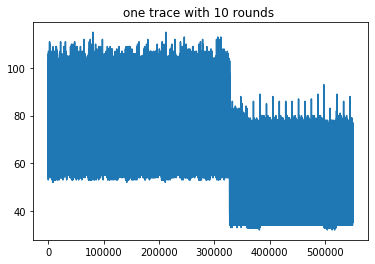

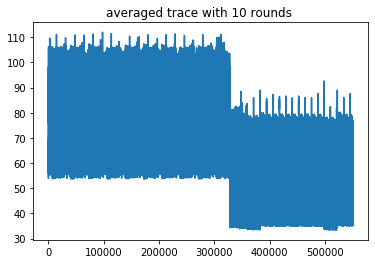

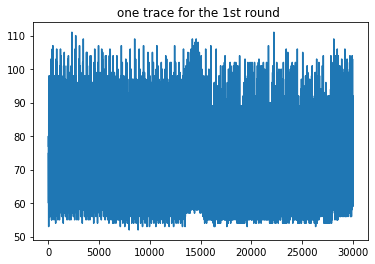

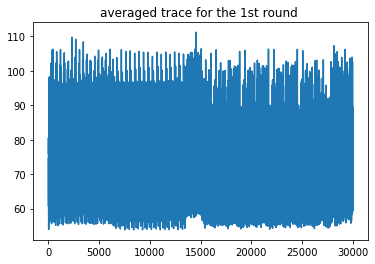

In [5]:
traces_unknown = myload(trfile2)
plaintexts_unknown = myin(ptfile2)

#Use this to check that you loaded the files correctly
print("traces_unknown", traces_unknown.shape)
print("plaintexts_unknown", plaintexts_unknown.shape)

#TODO:
#After doing the next part you can come back here and change the
#start and stop values to remove the parts of the trace we don't need.
#E.g. let's make up some numbers. If the leakage window starts at x = 123456
#and the window ends at x = 246912 you set start and stop to those values
#respectively
start = 0
stop = traces_unknown.shape[1]
traces_unknown = traces_unknown[:, start:stop]

#TODO:
#plot one of the power traces.
#Try to determine if you can see the 10 rounds of AES
#in the traces. Also, try to determine if keybytes are
#calculated in series (8-bit operations), 4 at a time
#(32-bit operations), or all parallely.



plt.plot(traces_unknown[1,:])
plt.title('one trace with 10 rounds ')
plt.show()

plt.plot(np.mean(traces_unknown, axis=0))
plt.title('averaged trace with 10 rounds ')
plt.show()

#TODO:
#Plot only the first round (or two) of AES.
#Also plot vertical lines around where you think we will
#find the information leakage. To plot vertical lines
#you can use the command
#plt.axvline(x, color, xmin, xmax, linestyle)
#
#You may wish to delimit your traces around where
#the leakage point is to speed up computations later

traces_unknown = traces_unknown[:,0:30000]


plt.plot(traces_unknown[1,:])
plt.title('one trace for the 1st round ')
plt.show()

plt.plot(np.mean(traces_unknown, axis=0))
plt.title('averaged trace for the 1st round ')
plt.show()


In [6]:
key_guess=np.array([])
for BYTE in range(16):
   
    #YOUR CODE HERE#
    
    powerhyp=np.zeros((traces_unknown.shape[0],256))
    for K in range(256):
        Sin = plaintexts_unknown[:,BYTE] ^ K
        Sout= Sbox[Sin]
        Sout_HW = byteHammingWeight[Sout]
        powerhyp[:,K]=Sout_HW
    CC = mycorr(powerhyp, traces_unknown)
    guessed_key,time_point= np.unravel_index(np.absolute(CC).argmax(), CC.shape)
    key_guess=np.append(key_guess,guessed_key)
    #TODO:
    #Write code to find the correct keybyte.
    #You will want to print it. Depending on your code
    #you may have to print it inside the loop.
print('The guessed key is shown below')
for x in key_guess.astype(int):
    print(hex(x))

The guessed key is shown below
0x5
0xde
0xad
0xbe
0xef
0x42
0x0
0x68
0x61
0x63
0x6b
0x65
0x64
0x6b
0x65
0x79


In [7]:
traces_unknown.shape[0]

149

(256, 30000)


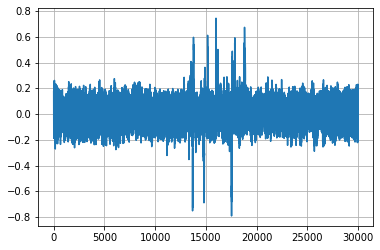

In [57]:
print(CC.shape)
key_guess.astype(int)[15]
plt.plot(CC[121,:])
plt.grid()
plt.show()


(256, 30000)


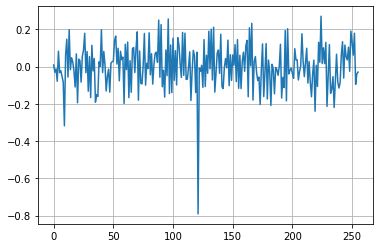

In [58]:
print(CC.shape)
key_guess.astype(int)[15]
plt.plot(CC[:,time_point])
plt.grid()
plt.show()